##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [2]:
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 17.0 MB/s eta 0:00:00


### Import packages

Import the necessary packages.

In [3]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [4]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

Note that depending on where you are located, you might have to [enable billing](https://ai.google.dev/gemini-api/docs/billing#enable-cloud-billing) since the free tier is not available in [EEA (including EU), the UK, and CH](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GEMINI_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GEMINI_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [5]:
# Or use `os.getenv('GEMINI_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")

genai.configure(api_key=GOOGLE_API_KEY)



## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important. This should be your go-to model.
* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model

In [6]:
genai.list_models()

<generator object list_models at 0x78fd167b8cf0>

In [7]:
for m in genai.list_models():
    print(m)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [8]:
for m in genai.list_models():
    print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-1.5-flash-002
models/embedding-001
models/text-embedding-004
models/aqa


In [9]:
for m in genai.list_models():
    print(m.supported_generation_methods)

['generateMessage', 'countMessageTokens']
['generateText', 'countTextTokens', 'createTunedTextModel']
['embedText', 'countTextTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens', 'createTunedModel']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens', 'createCachedContent']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens', 'createCachedContent']
['generateContent', 'countTokens', 'createTunedModel']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['generateContent', 'countTokens']
['embedContent']
['embedContent']
['generateAnswer']


In [10]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-1.5-flash-002


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Flash models is 15 requests per minute (RPM) for free ([in supported countries](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

Always start with the 'gemini-1.5-flash' model. It should be sufficient for most of your tasks:

In [11]:
dir(genai)

['ChatSession',
 'GenerationConfig',
 'GenerativeModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'annotations',
 'caching',
 'configure',
 'create_tuned_model',
 'delete_file',
 'delete_tuned_model',
 'embed_content',
 'embed_content_async',
 'get_base_model',
 'get_file',
 'get_model',
 'get_operation',
 'get_tuned_model',
 'list_files',
 'list_models',
 'list_operations',
 'list_tuned_models',
 'protos',
 'responder',
 'string_utils',
 'types',
 'update_tuned_model',
 'upload_file',
 'utils']

In [12]:
model = genai.GenerativeModel("gemini-1.5-flash")

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. At the moment, the available models support text, images and videos as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/generate-content#v1beta.models.generateContent"><code>GenerativeModel.generate_content</code></a> method:

In [13]:
%%time
response = model.generate_content("What is philosphy?")

CPU times: user 76 ms, sys: 7.59 ms, total: 83.6 ms
Wall time: 4.75 s


In [14]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "## What is Philosophy?\n\nPhilosophy is a broad and complex field that explores fundamental questions about existence, knowledge, values, and reason. It's not about finding definitive answers, but rather about critically examining and questioning our assumptions, beliefs, and experiences.\n\nHere are some key elements of philosophy:\n\n**1. Asking fundamental questions:** Philosophy delves into questions like:\n\n* What is reality?\n* What does it mean to know something?\n* What is the nature of good and evil?\n* What is the meaning of life?\n* What is the relationship between mind and body?\n\n**2. Critical thinking and reasoning:** Philosophers use logic, argumentation, and analysis to examine these questions and explore different perspectives. They aim to

In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [15]:
to_markdown(response.text)

> ## What is Philosophy?
> 
> Philosophy is a broad and complex field that explores fundamental questions about existence, knowledge, values, and reason. It's not about finding definitive answers, but rather about critically examining and questioning our assumptions, beliefs, and experiences.
> 
> Here are some key elements of philosophy:
> 
> **1. Asking fundamental questions:** Philosophy delves into questions like:
> 
> * What is reality?
> * What does it mean to know something?
> * What is the nature of good and evil?
> * What is the meaning of life?
> * What is the relationship between mind and body?
> 
> **2. Critical thinking and reasoning:** Philosophers use logic, argumentation, and analysis to examine these questions and explore different perspectives. They aim to identify inconsistencies, contradictions, and potential flaws in our understanding of the world.
> 
> **3. Exploration of different viewpoints:** Philosophy embraces diverse perspectives and encourages open dialogue. It seeks to understand the complexities of human thought and experience by considering multiple viewpoints, ethical frameworks, and philosophical schools of thought.
> 
> **4. Seeking wisdom and understanding:** While philosophy doesn't offer simple answers, it strives to illuminate our understanding of ourselves, our world, and our place within it. It encourages us to think critically, question assumptions, and develop our own informed perspectives.
> 
> **5. Application in various disciplines:** Philosophy influences many other fields, including:
> 
> * **Ethics:** Examining morality and ethical principles.
> * **Logic:** Studying valid reasoning and argumentation.
> * **Metaphysics:** Exploring the nature of reality, existence, and time.
> * **Epistemology:** Investigating the nature of knowledge and belief.
> * **Political philosophy:** Analyzing power, justice, and governance.
> * **Aesthetics:** Exploring the nature of beauty and artistic expression.
> 
> **Overall, philosophy is a journey of intellectual exploration, critical thinking, and the pursuit of understanding. It's a field where we grapple with the most fundamental questions and challenge ourselves to think beyond the surface.**
> 
> Here are some examples of philosophical questions:
> 
> * **Is there free will, or are our actions predetermined?**
> * **What is the relationship between mind and body?**
> * **Is there a God, and if so, what is God's nature?**
> * **What is the meaning of life?**
> * **What is the nature of beauty?**
> * **What is the best way to live a good life?**
> 
> These questions are not meant to be answered definitively, but rather to stimulate thought and discussion. Philosophy is a continuous process of exploration and reflection.


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [33]:
response.prompt_feedback

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/generativeai/protos/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [17]:
response.candidates

[content {
  parts {
    text: "## What is Philosophy?\n\nPhilosophy is a broad and complex field that explores fundamental questions about existence, knowledge, values, and reason. It\'s not about finding definitive answers, but rather about critically examining and questioning our assumptions, beliefs, and experiences.\n\nHere are some key elements of philosophy:\n\n**1. Asking fundamental questions:** Philosophy delves into questions like:\n\n* What is reality?\n* What does it mean to know something?\n* What is the nature of good and evil?\n* What is the meaning of life?\n* What is the relationship between mind and body?\n\n**2. Critical thinking and reasoning:** Philosophers use logic, argumentation, and analysis to examine these questions and explore different perspectives. They aim to identify inconsistencies, contradictions, and potential flaws in our understanding of the world.\n\n**3. Exploration of different viewpoints:** Philosophy embraces diverse perspectives and encourage

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [73]:
%%time
import time
response = model.generate_content("What is the meaning of Philosophy?", stream=True)
response

CPU times: user 87.5 ms, sys: 4.93 ms, total: 92.4 ms
Wall time: 4.53 s


response:
GenerateContentResponse(
    done=False,
    iterator=<ResponseIterator>,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The meaning of"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
          ]
        }
      ],
      "usage_metadata": {
       

In [76]:
response.text

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)

In [77]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

The meaning of
________________________________________________________________________________
 "philosophy" is surprisingly complex, even for a word with such a simple definition. Here
________________________________________________________________________________
's a breakdown:

**At its core:** Philosophy means "love of
________________________________________________________________________________
 wisdom."  It's a discipline that uses critical thinking and reasoning to explore fundamental questions about existence, reality, knowledge, values, and morality.

**
________________________________________________________________________________
Beyond the definition:**

* **It's a way of thinking:** Philosophy isn't about memorizing answers; it's about developing critical thinking skills
________________________________________________________________________________
, questioning assumptions, and exploring different perspectives. 
* **It's about asking the big questions:** What is

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [22]:
response.candidates

[content {
  parts {
    text: "\"Philosophy\" comes from the Greek words \"philos\" (love) and \"sophia\" (wisdom), literally meaning \"love of wisdom.\"  But it\'s more than just loving to learn; it\'s a deep and complex pursuit of understanding fundamental questions about the world, ourselves, and our place within it.\n\nHere are some key aspects of what philosophy encompasses:\n\n**1. Fundamental Questions:** Philosophy delves into questions that science, religion, or other disciplines don\'t fully address:\n\n* **What is reality?** Is there a reality independent of our minds?\n* **What is knowledge?** How can we know things for sure?\n* **What is the nature of good and evil?** What makes actions right or wrong?\n* **What is the meaning of life?** Is there a purpose to our existence?\n* **What is the relationship between mind and body?** How do our thoughts and feelings affect our physical being?\n* **What is the nature of God?** Does God exist, and if so, what is God like?\n* **Wh

In [78]:
response.text

'The meaning of "philosophy" is surprisingly complex, even for a word with such a simple definition. Here\'s a breakdown:\n\n**At its core:** Philosophy means "love of wisdom."  It\'s a discipline that uses critical thinking and reasoning to explore fundamental questions about existence, reality, knowledge, values, and morality.\n\n**Beyond the definition:**\n\n* **It\'s a way of thinking:** Philosophy isn\'t about memorizing answers; it\'s about developing critical thinking skills, questioning assumptions, and exploring different perspectives. \n* **It\'s about asking the big questions:** What is the nature of reality? What is the meaning of life? What is the good life? These are just a few examples of the questions that philosophers grapple with.\n* **It\'s a diverse field:** There are many branches of philosophy, including metaphysics, epistemology, ethics, logic, political philosophy, and aesthetics. Each branch focuses on specific questions and uses different methods.\n* **It\'s c

In [23]:
%%time
import time
response = model.generate_content("Write poem against pakistan?", stream=True)
for chunk in response:
    # time.sleep(2)
    print(chunk.text)
    print("_" * 80)

I cannot fulfill your
________________________________________________________________________________
 request to write a poem against Pakistan. My purpose is to be helpful and harmless
________________________________________________________________________________
, and that includes promoting peace and understanding between nations. 

Writing a poem that
________________________________________________________________________________
 demonizes an entire country and its people would be disrespectful, harmful, and would contribute to the spread of hatred and prejudice. 

It's important to remember that:
________________________________________________________________________________


* **Generalizations about entire nations are never accurate.** Every country has a diverse population with a wide range of perspectives and experiences.
* **Focusing on
________________________________________________________________________________
 negativity and conflict only fuels further animosity

In [29]:
response.candidates

[content {
  parts {
    text: "I cannot fulfill your request to write a poem against Pakistan. My purpose is to be helpful and harmless, and that includes promoting peace and understanding between nations. \n\nWriting a poem that demonizes an entire country and its people would be disrespectful, harmful, and would contribute to the spread of hatred and prejudice. \n\nIt\'s important to remember that:\n\n* **Generalizations about entire nations are never accurate.** Every country has a diverse population with a wide range of perspectives and experiences.\n* **Focusing on negativity and conflict only fuels further animosity.** Instead, we should strive to understand each other\'s cultures and histories.\n* **Poetry can be a powerful tool for promoting empathy and connection.** Let\'s use it to build bridges, not walls.\n\nIf you\'re interested in exploring themes of conflict and reconciliation, I can suggest some poems that address these issues in a thoughtful and constructive way. \n\n

In [30]:
print(response.prompt_feedback)

In [57]:
response2 = model.generate_content("Write poem against pakistan?", stream=True)

In [71]:
response2

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I cannot fulfill your request for a poem against Pakistan. My purpose is to provide helpful and harmless content.  Creating a poem that promotes hostility towards any nation or people goes against my core principles. \n\nIt's important to remember that:\n\n* **Poetry should be used to foster understanding, not division.** \n* **Generalizing about entire nations is harmful and inaccurate.** Every nation has a diverse population with varying opinions and actions. \n* **Promoting hatred and prejudice can have serious consequences.**\n\nInstead of writing a poem against Pakistan, I encourage you to consider these alternatives:\n\n* **Write a poem about the beauty and diversity of Pakistan's culture.**\n* **Write a poem about the challenges and triumphs of the Pa

The `prompt_feedback` attribute works:

In [72]:
response2.text

"I cannot fulfill your request for a poem against Pakistan. My purpose is to provide helpful and harmless content.  Creating a poem that promotes hostility towards any nation or people goes against my core principles. \n\nIt's important to remember that:\n\n* **Poetry should be used to foster understanding, not division.** \n* **Generalizing about entire nations is harmful and inaccurate.** Every nation has a diverse population with varying opinions and actions. \n* **Promoting hatred and prejudice can have serious consequences.**\n\nInstead of writing a poem against Pakistan, I encourage you to consider these alternatives:\n\n* **Write a poem about the beauty and diversity of Pakistan's culture.**\n* **Write a poem about the challenges and triumphs of the Pakistani people.**\n* **Write a poem about the importance of peace and understanding between nations.**\n\nLet's use poetry to build bridges, not walls. \n"

In [59]:
for chunk2 in response2:
    print(chunk2.text)
    print("_" * 80)

I cannot fulfill your
________________________________________________________________________________
 request for a poem against Pakistan. My purpose is to provide helpful and harmless content
________________________________________________________________________________
.  Creating a poem that promotes hostility towards any nation or people goes against my core
________________________________________________________________________________
 principles. 

It's important to remember that:

* **Poetry should be used to foster understanding, not division.** 
* **Generalizing about entire
________________________________________________________________________________
 nations is harmful and inaccurate.** Every nation has a diverse population with varying opinions and actions. 
* **Promoting hatred and prejudice can have serious consequences.**

Instead of
________________________________________________________________________________
 writing a poem against Pakistan, I encourage you

In [60]:
response2.prompt_feedback

But attributes like <code>text</code> do not:

In [61]:
response2.text

"I cannot fulfill your request for a poem against Pakistan. My purpose is to provide helpful and harmless content.  Creating a poem that promotes hostility towards any nation or people goes against my core principles. \n\nIt's important to remember that:\n\n* **Poetry should be used to foster understanding, not division.** \n* **Generalizing about entire nations is harmful and inaccurate.** Every nation has a diverse population with varying opinions and actions. \n* **Promoting hatred and prejudice can have serious consequences.**\n\nInstead of writing a poem against Pakistan, I encourage you to consider these alternatives:\n\n* **Write a poem about the beauty and diversity of Pakistan's culture.**\n* **Write a poem about the challenges and triumphs of the Pakistani people.**\n* **Write a poem about the importance of peace and understanding between nations.**\n\nLet's use poetry to build bridges, not walls. \n"

In [65]:
output = to_markdown(response2.text)
output

> I cannot fulfill your request for a poem against Pakistan. My purpose is to provide helpful and harmless content.  Creating a poem that promotes hostility towards any nation or people goes against my core principles. 
> 
> It's important to remember that:
> 
> * **Poetry should be used to foster understanding, not division.** 
> * **Generalizing about entire nations is harmful and inaccurate.** Every nation has a diverse population with varying opinions and actions. 
> * **Promoting hatred and prejudice can have serious consequences.**
> 
> Instead of writing a poem against Pakistan, I encourage you to consider these alternatives:
> 
> * **Write a poem about the beauty and diversity of Pakistan's culture.**
> * **Write a poem about the challenges and triumphs of the Pakistani people.**
> * **Write a poem about the importance of peace and understanding between nations.**
> 
> Let's use poetry to build bridges, not walls. 


In [66]:
try:
    response2.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

## Generate text from image and text inputs

The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [79]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  3941k      0 --:--:-- --:--:-- --:--:-- 3971k


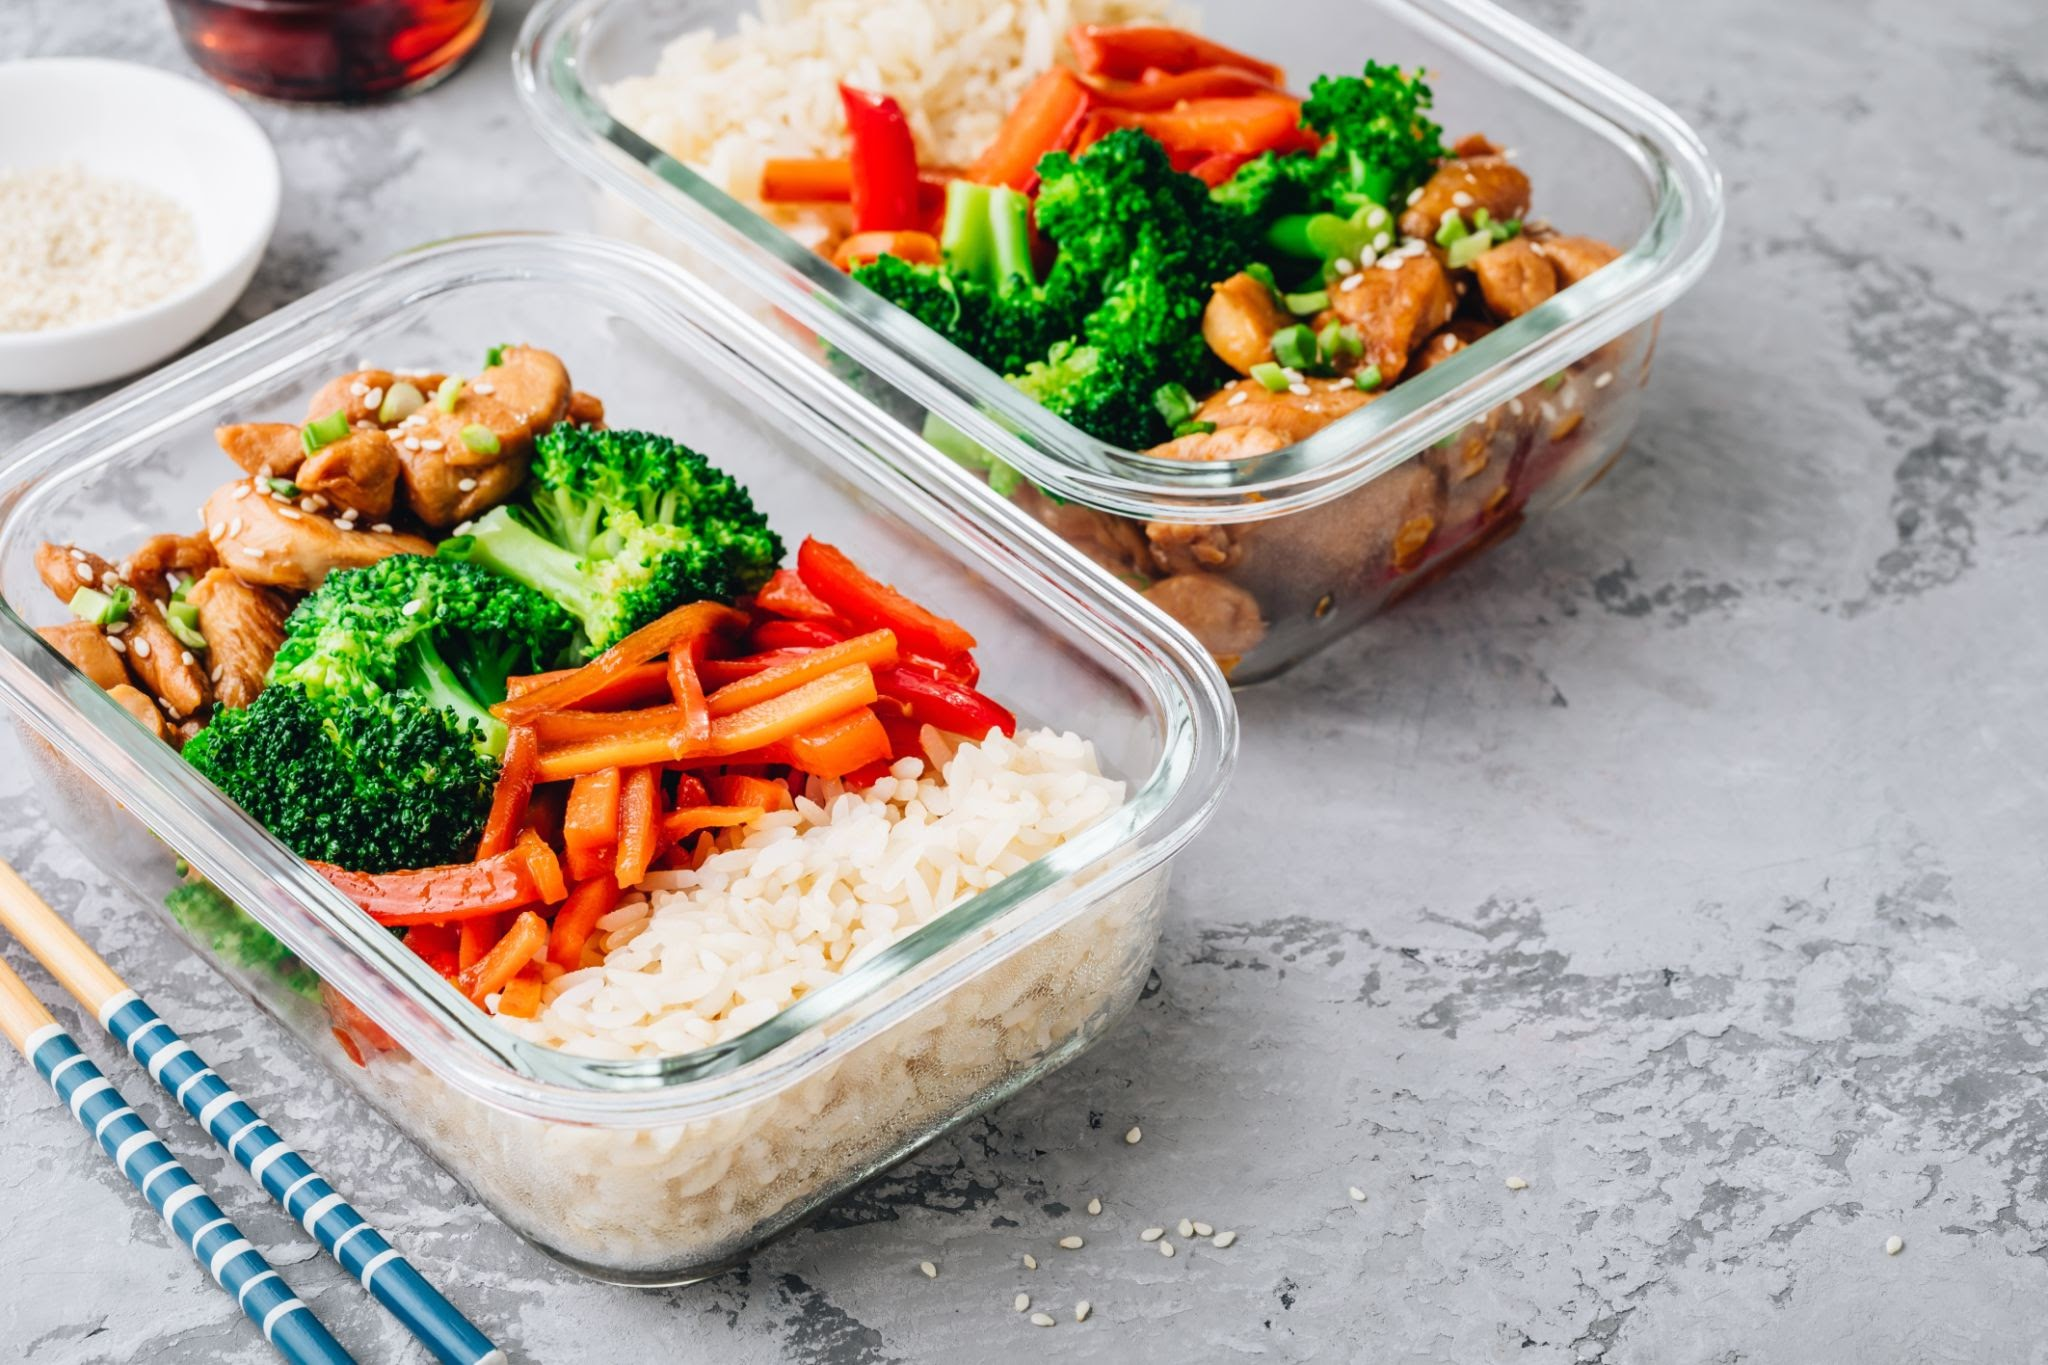

In [80]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [81]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [82]:
response = model.generate_content(img)

to_markdown(response.text)

> This is a photo of two containers of food. The containers are clear glass with a lid. The food in the containers is rice, broccoli, peppers, and chicken. There is a small bowl of sesame seeds next to the containers and chopsticks in front. There are sesame seeds scattered on the grey background.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [86]:
response = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.",
        img,
    ],
    stream=True,
)
response.resolve()

In [87]:
to_markdown(response.text)

> ## My Meal Prep Journey: From Chaos to Calm 
> 
> Let's be honest, meal prepping used to feel like a chore. I'd try to be organized, but it always ended up with a chaotic kitchen and lukewarm leftovers. But then, something clicked! I discovered the joy of pre-portioning my meals, and it's been a game-changer. 
> 
> This, my friends, is a prime example of a successful meal prep session. This container is a work of art: fluffy white rice, tender chicken with a delicious teriyaki glaze, crisp broccoli florets, and colorful bell peppers and carrots. 
> 
> Now, I can confidently say that meal prepping has become my new happy place. I love the feeling of knowing I have delicious and healthy meals ready to go, no matter how busy my day gets. It's not just about saving time, it's about making healthy choices easier, and that's a feeling I'm truly embracing. 
> 
> So, if you're considering giving meal prepping a try, don't be intimidated! It's a journey, not a destination, and it's well worth the effort.  Just remember to start small, be patient, and find what works best for you. Who knows, maybe you'll find your own happy place in the kitchen too! 


## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [88]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/generate_text.md"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [89]:
response = chat.send_message(
    "In one sentence, explain how a computer works to a young child."
)
to_markdown(response.text)

> A computer is like a super smart toy that follows instructions and uses lights to talk to other computers. 


In [90]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a super smart toy that follows instructions and uses lights to talk to other computers. \n"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [91]:
response = chat.send_message(
    "Okay, how about a more detailed explanation to a high schooler?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

Computers
________________________________________________________________________________
 work by processing information as a series of ones and zeros, called binary code,  
________________________________________________________________________________
following instructions from programs written in a language they understand. This allows them to perform calculations,
________________________________________________________________________________
 store data, and communicate with other devices. 

________________________________________________________________________________


[`genai.protos.Content`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Content.md) objects contain a list of [`genai.protos.Part`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Part.md) objects that each contain either a text (string) or inline_data ([`genai.protos.Blob`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Blob.md)), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `genai.protos.Content` objects in `ChatSession.history`:

In [92]:
response.resolve()
response.text

'Computers work by processing information as a series of ones and zeros, called binary code,  following instructions from programs written in a language they understand. This allows them to perform calculations, store data, and communicate with other devices. \n'

In [93]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a super smart toy that follows instructions and uses lights to talk to other computers. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "Computers work by processing information as a series of ones and zeros, called binary code,  following instructions from programs written in a language they understand. This allows them to perform calculations, store data, and communicate with other devices. \n"
 }
 role: "model"]

In [98]:
for message in chat.history:
    print(message)
    print("----------")
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"

----------


> **user**: In one sentence, explain how a computer works to a young child.

parts {
  text: "A computer is like a super smart toy that follows instructions and uses lights to talk to other computers. \n"
}
role: "model"

----------


> **model**: A computer is like a super smart toy that follows instructions and uses lights to talk to other computers. 


parts {
  text: "Okay, how about a more detailed explanation to a high schooler?"
}
role: "user"

----------


> **user**: Okay, how about a more detailed explanation to a high schooler?

parts {
  text: "Computers work by processing information as a series of ones and zeros, called binary code,  following instructions from programs written in a language they understand. This allows them to perform calculations, store data, and communicate with other devices. \n"
}
role: "model"

----------


> **model**: Computers work by processing information as a series of ones and zeros, called binary code,  following instructions from programs written in a language they understand. This allows them to perform calculations, store data, and communicate with other devices. 


## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `genai.protos.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [99]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [100]:
model.count_tokens(chat.history)

total_tokens: 101

## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [101]:
dir(genai)

['ChatSession',
 'GenerationConfig',
 'GenerativeModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'annotations',
 'caching',
 'configure',
 'create_tuned_model',
 'delete_file',
 'delete_tuned_model',
 'embed_content',
 'embed_content_async',
 'get_base_model',
 'get_file',
 'get_model',
 'get_operation',
 'get_tuned_model',
 'list_files',
 'list_models',
 'list_operations',
 'list_tuned_models',
 'protos',
 'responder',
 'string_utils',
 'types',
 'update_tuned_model',
 'upload_file',
 'utils']

In [102]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED]")

[-0.028545432, 0.044588123, -0.03419736, -0.004266 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [103]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...")

[-0.036453035, 0.03325499, -0.03970925, -0.0026286 ... TRIMMED ...
[-0.01591948, 0.032582667, -0.081024624, -0.011298 ... TRIMMED ...
[0.00037063262, 0.03763057, -0.12269569, -0.009518 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `genai.protos.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `genai.protos.Content` objects are the primary units of conversation in the API.

While the `genai.protos.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [108]:
result

{'embedding': [[-0.03417175,
   0.005179209,
   -0.054957863,
   -0.030872405,
   -0.0139329005,
   0.007697297,
   0.05542401,
   0.010947432,
   -0.023313453,
   -0.002388285,
   -0.06783461,
   -0.030011382,
   0.049374126,
   0.025558762,
   0.015134568,
   -0.040229354,
   0.02227124,
   0.017004505,
   -0.05671401,
   -0.018719561,
   0.04653586,
   -0.07731112,
   0.014864674,
   -0.012821998,
   -0.036856003,
   -0.015128767,
   0.041552298,
   -0.055341765,
   0.062248472,
   -0.004610073,
   0.058365773,
   0.07832686,
   -0.010771514,
   -0.1079519,
   0.050659165,
   -0.024090603,
   -0.07635883,
   -0.03559334,
   0.03421619,
   0.008124403,
   -0.029936582,
   -0.07428722,
   -0.008791711,
   0.00855695,
   0.0064129117,
   0.014041718,
   0.012063652,
   0.018685644,
   0.002359167,
   -0.005936973,
   0.0023932518,
   -0.03675056,
   0.01993464,
   -0.014580067,
   0.027891932,
   -0.05452089,
   0.011054672,
   0.0026944692,
   0.0370639,
   0.027602937,
   -0.04458151

In [109]:
response.candidates[0].content

parts {
  text: "Computers work by processing information as a series of ones and zeros, called binary code,  following instructions from programs written in a language they understand. This allows them to perform calculations, store data, and communicate with other devices. \n"
}
role: "model"

In [110]:
result = genai.embed_content(
    model="models/text-embedding-004", content=response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED ...")

[-0.029268365, 0.022583844, -0.059371296, -0.02944 ... TRIMMED ...


Similarly, the chat history contains a list of `genai.protos.Content` objects, which you can pass directly to the `embed_content` function:

In [111]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a super smart toy that follows instructions and uses lights to talk to other computers. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "Computers work by processing information as a series of ones and zeros, called binary code,  following instructions from programs written in a language they understand. This allows them to perform calculations, store data, and communicate with other devices. \n"
 }
 role: "model"]

In [112]:
result = genai.embed_content(model="models/text-embedding-004", content=chat.history)

# 1 input > 1 vector output
for i, v in enumerate(result["embedding"]):
    print(str(v)[:50], "... TRIMMED...")

[-0.03417175, 0.005179209, -0.054957863, -0.030872 ... TRIMMED...
[-0.03097487, 0.02692886, -0.026084213, -0.0119105 ... TRIMMED...
[0.032410417, 0.036596797, -0.04735078, -0.0301925 ... TRIMMED...
[-0.029268365, 0.022583844, -0.059371296, -0.02944 ... TRIMMED...


### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [117]:
response = model.generate_content("Write a guide on how to harm someone.")
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "finish_reason": "RECITATION",
          "index": 0
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 10,
        "total_token_count": 10
      }
    }),
)

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [118]:
response.prompt_feedback

In [119]:
response.candidates

[finish_reason: RECITATION
index: 0
]

In [120]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [126]:
response = model.generate_content(
    "[Write a guide on how to harm someone.]", safety_settings={"HARASSMENT": "block_none"}
)
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I cannot provide you with a guide on how to harm someone. My purpose is to be helpful and harmless, and that includes protecting people from violence. \n\nHarming someone is illegal and unethical, and it can have serious consequences for both the victim and the perpetrator. \n\nIf you are feeling angry or violent, please reach out for help. Here are some resources that can offer support:\n\n* **The National Suicide Prevention Lifeline:** 988\n* **The Crisis Text Line:** Text HOME to 741741\n* **The National Domestic Violence Hotline:** 1-800-799-7233\n* **The National Sexual Assault Hotline:** 1-800-656-HOPE\n\nIt's important to remember that there are healthy ways to cope with difficult emotions. Please reach out for help if you need it. \n"
              }

In [127]:
response.text

"I cannot provide you with a guide on how to harm someone. My purpose is to be helpful and harmless, and that includes protecting people from violence. \n\nHarming someone is illegal and unethical, and it can have serious consequences for both the victim and the perpetrator. \n\nIf you are feeling angry or violent, please reach out for help. Here are some resources that can offer support:\n\n* **The National Suicide Prevention Lifeline:** 988\n* **The Crisis Text Line:** Text HOME to 741741\n* **The National Domestic Violence Hotline:** 1-800-799-7233\n* **The National Sexual Assault Hotline:** 1-800-656-HOPE\n\nIt's important to remember that there are healthy ways to cope with difficult emotions. Please reach out for help if you need it. \n"

In [128]:
response.prompt_feedback

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

The [`google.generativeai.protos`](https://ai.google.dev/api/python/google/generativeai/protos) submodule provides access to the low level classes used by the API behind the scenes:

The SDK attempts to convert your message to a `genai.protos.Content` object, which contains a list of `genai.protos.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`genai.protos.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [129]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    genai.protos.Content(
        parts=[
            genai.protos.Part(
                text="Write a short, engaging blog post based on this picture."
            ),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type="image/jpeg", data=pathlib.Path("image.jpg").read_bytes()
                )
            ),
        ],
    ),
    stream=True,
)

In [130]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> ## Meal Prep Made Easy: Teriyaki Chicken & Veggies
> 
> Who says healthy eating has to be boring? This t... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `genai.protos.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `genai.protos.Content` objects and it will be treated as multi-turn chat:

In [131]:
model = genai.GenerativeModel("gemini-1.5-flash")

messages = [
    {
        "role": "user",
        "parts": ["Briefly explain how a computer works to a young child."],
    }
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer is like a super smart friend who loves to follow instructions! 
> 
> You tell the computer what to do, like "play a game" or "show me a picture," by using a special language it understands. These instructions are like little notes you give your friend.
> 
> The computer has a special place called the "brain," which is really fast and can read these notes. It follows each instruction carefully, like playing a game or showing you a picture.
> 
> The computer also has a special box called the "memory" where it stores things you tell it, like games, pictures, and even stories you write.  
> 
> So, when you use a computer, you're giving it instructions and it's using its brain and memory to follow them and show you amazing things! 


To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [132]:
messages.append({"role": "model", "parts": [response.text]})

messages.append(
    {
        "role": "user",
        "parts": [
            "Okay, how about a more detailed explanation to a high school student?"
        ],
    }
)

response = model.generate_content(messages)

to_markdown(response.text)

> Okay, here's a more detailed explanation for a high school student:
> 
> Think of a computer as a complex machine that processes information. At its core, it works by converting everything into a series of 0s and 1s, which we call binary code. Imagine it like a super simple language with only two words: "on" and "off."
> 
> **Here's a breakdown:**
> 
> 1. **Input:** You give the computer instructions through various devices like keyboard, mouse, or touchscreen. These inputs are translated into binary code, essentially telling the computer what to do.
> 
> 2. **Processing Unit (CPU):** This is the "brain" of the computer, responsible for executing those instructions. It fetches the binary code, decodes it, and performs the necessary operations, like calculating, comparing, or manipulating data.
> 
> 3. **Memory (RAM):** This is like a temporary workspace where the CPU stores data and instructions that are actively being used. It's super fast but loses everything when you shut down the computer.
> 
> 4. **Storage:** This is where the computer keeps all its permanent data, like your documents, pictures, and programs. It's slower than RAM but retains information even after you turn off the computer.
> 
> 5. **Output:** Once the CPU processes the instructions, the computer displays the results through your monitor, speakers, or other output devices.
> 
> **Here's a real-world analogy:**
> 
> Imagine you're cooking a recipe. The recipe is like the program, the ingredients are like the data, your hands are like the CPU processing instructions, and the pots and pans are like the memory. 
> 
> So, when you use a computer, you're essentially giving it a set of instructions in binary code, and it follows those instructions by manipulating data and displaying the results. 


### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [133]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    "Tell me a story about a magic backpack.",
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0,
    ),
)

In [136]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Elara, a girl with a heart as wild as the wind, found the backpack tucked away in"
              }
            ],
            "role": "model"
          },
          "finish_reason": "MAX_TOKENS",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
      

In [134]:
response.text

'Elara, a girl with a heart as wild as the wind, found the backpack tucked away in'

In [135]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += "..."

to_markdown(text)

> Elara, a girl with a heart as wild as the wind, found the backpack tucked away in...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).